In [34]:
import numpy as np

n = 5
prior = [1./n]*n # uniform

world = ['red','green','green','red','red']
environment = ['red','green']
motions = [1,1]
pHit,pMiss = 0.6,0.2
pUndershoot,pOvershoot,pExact = 0.1,0.1,0.8

# Sensing changes a prior to a posterior distribution, gains information.
# Entropy decreases - distribution becomes less uniform (more evidence in posterior).
def sense(p,Z): 
    q = []
    for i,prob in enumerate(p):
        hit = (Z == world[i]) # 1 if true, 0 if false
        q.append(p[i]*(pHit*hit + (1-hit)*pMiss))
    q = q / np.sum(q)
    return q

# Moving is inexact, the distance moved is randomly (normally) distributed - loses information, but often less than gained by sensing.
# Entropy increases - distribution becomes more uniform.
def move(p,U):
    q = []
    for i in range(len(p)):
        s = pExact*p[(i-U)%len(p)]
        s += pUndershoot*p[(i-U+1)%len(p)] # `+` here means concatenate to list as list type
        s += pOvershoot*p[(i-U-1)%len(p)] # `%` means modulo len(p)
        q.append(s) 
    return q

'''First senses red, then moves 1, then senses green, then moves 1 - what is posterior distribution?'''
steps = np.stack((environment,motions),axis=0).T
p = prior
for current in steps:
    p = sense(p,current[0])
    p = move(p,int(current[1]))

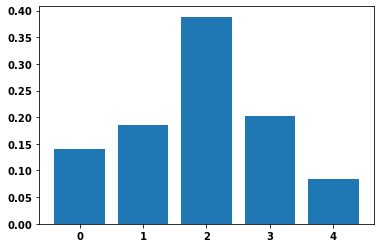

In [36]:
import matplotlib.pyplot as plt
x = np.arange(len(p))
plt.bar(x,p)
plt.show()

### Formalism - Probabilistic inference:

$P(X_i|Z)=\frac{P(Z|X_i)P(X_i)}{P(Z)}=\frac{P(Z|X_i)P(X_i)}{P(Z|\neg X_i)P(\neg X_i)+P(Z|X_i)P(X_i)}$ - the same as sensing algorithm above but mathematically put, given measurement $Z$.

$P(X_i^t)=\sum_jP(X_j^{t-1})P(X_i^t|X_j^{t-1})=\sum_jP(X_i,X_j)$ - the same as the motion algorithm above but mathematically put - total probability theorem.

#### Example:

Let there be a fair coin toss, if the result is tails it is accepted, but if it is heads, a reflip is done, and the next result taken.

What is probability of a final result of heads?

$X={H,T}$. $P(H)=P(H^1)+P(H^2)$. Due to rules, $P(H^1)=0$, so $P(H)=P(H^2)$.

$\therefore P(H^2)=\sum_{X_2^1=H,T}P(H^2|X_2^1)P(X_2^1)=P(H^2|H^1)P(H^1)+P(H^2|T^1)P(T^1)=0.5*0.5+0*0.5=0.25$